# The Data Wrangle and Analysis Project


The main goal of this project is to make a good wrangle and analysis of the Twitter account @WeRateDogs from different data resources and obtain at least 8 quality issues and at least 2 tidiness issues and fix them to produce effective analysis.

We have three types of datasets: 
    1. Enhanced Twitter Archive Dataset
    2. Predicted Images Dataset
    3. Retrieved Data from Twitter API.

# Project Steps: 

a) Data Wrangling which consists of three main steps: 
    1. Gathering Datasets
    2. Assessing Datasets
    3. Cleaning Datasets

b) Storing the datasets after the steps mentioned above to obtain report and visualization of data.

In [447]:
#The libraries that help in processes of data gathering, assessing, and cleaning.
import pandas as pd
import numpy as np
import requests
import re
import tweepy
import json
import os
import time
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# >> Gathering Datasets

# 1. Reading Twitter Achived Data: 

In [287]:
twitter_enhanced_dataset = pd.read_csv('twitter-archive-enhanced.csv')

# 2. Reading The Image Prediction Dataset

In [138]:
urlsource ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = urlsource.split('/')[-1]
response = requests.get(urlsource)
if not os.path.isfile(filename):
    with open(filename, 'wb') as file:
        file.write(response.content)
image_predictions_dataset = pd.read_csv(filename, sep='\\t', engine = 'python')        

# 3. Retrive Tweets from Twitter API (Twitter_API_Dataset)

In [73]:
CONSUMER_KEY = 'Hidden'
CONSUMER_SECRET = 'Hidden'
OAUTH_TOKEN = 'Hidden'
OAUTH_TOKEN_SECRET = 'Hidden'

In [32]:
# Using Twippy Liberary to Retrieve Tweets:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [52]:
# Get the tweet ID to get the original tweets
original_tweet_ids = twitter_enhanced_dataset['tweet_id']

In [34]:
# creating a list for tweets with exceptions/errors 
error_tweets = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# For loop which will add each available tweet json to df_list
for tweet_id in original_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_tweets.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

Rate limit reached. Sleeping for: 449


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 434


Total time taken for execution 2086.917227268219


In [61]:
# get a tweet data for showing it
tweet = api.get_status(twitter_enhanced_dataset.tweet_id[1], tweet_mode='extended')
showinfo = tweet._json
print(showinfo)

print('---------------------------------------------------------------')
# total tweets received from api
print("The No. of Twitter API Dataset", len(df_tweets))

# The tweet_id of the errors received from api
print("The No. of Errors", len(error_tweets))

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017', 'id': 892177421306343426, 'id_str': '892177421306343426', 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV", 'truncated': False, 'display_text_range': [0, 138], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h

In [37]:
# Save the final dataset retrived from twitter API
jsonretriveddata = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the retrived twitter API data to Text file
jsonretriveddata.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [38]:
# Reading the Text file saved and turn it into dataframe
twitter_api_dataset = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

At this point the gathering of the three dataset is finished. For revision we collected the following three datasets: 
    1. twitter_enhanced_dataset
    2. image_predictions_dataset
    3. twitter_api_dataset
    
The next step in data Assessing.

# >> Assessing Datasets and Cleaning

# 1. Assessing:


<font color = 'blue'><h3><b>A. twitter_enhanced_dataset</b></h3></font>

In [68]:
# Get the info of the twitter_enhanced_dataset dataset
twitter_enhanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [80]:
print("Data type for timestamp:  " + str(type(twitter_enhanced_dataset.timestamp[0])))

Data type for timestamp:  <class 'str'>


<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

1. <b>timestamp</b> feature is stored in the wrong data string (object) type must be in date format. 

In [90]:
#Get the data
twitter_enhanced_dataset.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2278,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,None,None,None
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,None,None,None
1285,708469915515297792,NaN,NaN,2016-03-12 01:49:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobble. He's a Croatian Galifianakis. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708469915...,11,10,Bobble,None,None,None,None
950,752173152931807232,NaN,NaN,2016-07-10 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's a lifeguard. Always prepar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752173152...,12,10,Brody,None,None,None,None
1588,686730991906516992,NaN,NaN,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686730991...,12,10,None,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
131,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
1342,704819833553219584,NaN,NaN,2016-03-02 00:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,None,None,None,None
1199,716791146589110272,NaN,NaN,2016-04-04 00:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jennifur. She's supposed to be navigating...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716791146...,11,10,Jennifur,None,None,None,None
1898,674690135443775488,NaN,NaN,2015-12-09 20:40:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Patrick. He's an exotic pup. Jumps great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,None,None,None,None


<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

2. It is not necessary to make 4 columns for the <b>doggo, floofer, pupper, puppo</b>. We can merge them in one column such as dog_status.

3. The <b>in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp</b> features must be removed because we want to analyze the original tweets and it will not be useful.

4. Also the name <b>"floofer"</b> is not true its called <b>"floof"</b>. We can update the name.

5. In <b>"puppo"</b> we can change the "None" to "NaN".

In [91]:
#Getting the counts of the missing values of the twitter_enhanced_dataset
twitter_enhanced_dataset.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>
    
7. As I mentioned above, there are a lot of missing values in <b>in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp</b>
    
8. The <b> expanded_urls </b> have some missing values.

In [116]:
# count numbers of values in column name that equal None
print ("No. of None Values in name: "+ str((twitter_enhanced_dataset.loc[:, 'name'] =='None').sum()))

No. of None Values in name: 745


<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

9. There are some values with noname in feature <b>name</b>

In [118]:
# list all names that are NOT capitalized
non_capital_names = twitter_enhanced_dataset.name.str.contains('^[a-z]', regex = True)
twitter_enhanced_dataset[non_capital_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

10. There are some values not considered as actuall names in <b>name</b> feature.

In [144]:
# Check the range of values in numerator ratings
twitter_enhanced_dataset.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

11. There are very high numerator ratings which is bigger than 14 or 15 which not considered as actuall ratings.

In [143]:
# Check the range of values in denominator ratings
twitter_enhanced_dataset.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

12. The denominator ratings must be 10 there are some values greater or less than 10 which is wrong values.

<font color = 'blue'><h3><b>B. image_predictions_dataset</b></h3></font>

In [141]:
image_predictions_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [152]:
image_predictions_dataset.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,Labrador_retriever,1.096350e-01,True,kuvasz,2.795070e-03,True
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,1.796250e-01,True,sombrero,1.214930e-01,False
1495,783347506784731136,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,3.685660e-01,True,Chihuahua,3.329570e-03,True
248,670676092097810432,https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg,1,Dandie_Dinmont,0.676102,True,West_Highland_white_terrier,4.082560e-02,True,clumber,3.953330e-02,True
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,2.890960e-02,False,doormat,2.225070e-02,False
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,1.118840e-01,True,basenji,1.111520e-01,True
1720,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,4.411980e-02,True,Doberman,3.183490e-02,True
1985,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,8.178280e-03,True,Chesapeake_Bay_retriever,7.359270e-03,True
1382,765395769549590528,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,3.304010e-01,True,Shetland_sheepdog,3.887490e-02,True
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

13. p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, and p3_dog are three prediction values of the dog image. We can take only the best prediction with the breed name of the dog. 
14. p1,p2, and p3 values sometimes start with upper letters. we can make it all lower letters. Also we can remove the (_).
15. The jpg_url feature will be removed because it is not useful in the analysis.

<font color = 'blue'><h3><b>C. twitter_api_dataset</b></h3></font>

In [154]:
twitter_api_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
favorites          2331 non-null int64
retweets           2331 non-null int64
user_followers     2331 non-null int64
user_favourites    2331 non-null int64
date_time          2331 non-null object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [155]:
twitter_api_dataset.sample(20)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2140,669367896104181761,430,140,8878858,145866,2015-11-25 04:11:57+00:00
1820,675845657354215424,2161,832,8878855,145866,2015-12-13 01:12:15+00:00
1936,673359818736984064,1363,629,8878855,145866,2015-12-06 04:34:25+00:00
526,805958939288408065,0,5349,8878864,145866,2016-12-06 02:15:59+00:00
2240,667534815156183040,766,488,8878858,145866,2015-11-20 02:47:56+00:00
747,777684233540206592,11141,2910,8878820,145866,2016-09-19 01:42:24+00:00
1130,725458796924002305,1379,595,8878842,145866,2016-04-27 22:57:10+00:00
667,788150585577050112,6108,1274,8878818,145866,2016-10-17 22:51:57+00:00
231,846514051647705089,43290,11084,8878862,145866,2017-03-28 00:07:32+00:00
1994,672125275208069120,2255,1070,8878857,145866,2015-12-02 18:48:47+00:00


In [163]:
print("Data type for date_time:  " + str(type(twitter_api_dataset.date_time[0])))

Data type for date_time:  <class 'str'>


<h4><font color='red'><b>Quality and Tidiness Issues</b></font></h4>

16. <b>date_time</b> feature is string
17. <b>user_followers, user_favourites, and date_time</b> is not useful columns in analysis. date_time is already in twitter enhanced dataset.  

# 2. Cleaning

In [360]:
# Take a copies from all the datasets to not waste the original ones
twitter_enhanced_clean = twitter_enhanced_dataset.copy()
image_predictions_clean = image_predictions_dataset.copy()
twitter_api_clean = twitter_api_dataset.copy()

In [361]:
# Convert timestamp from string to datetime
twitter_enhanced_clean.timestamp = pd.to_datetime(twitter_enhanced_clean.timestamp)

In [362]:
# drop the rows that is not actuall ratings.
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.rating_numerator < 10].index, inplace = True)
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.rating_numerator >= 20].index, inplace = True)

In [363]:
twitter_enhanced_clean.rating_numerator.value_counts().sort_index(ascending = False)

17      1
15      2
14     54
13    351
12    558
11    464
10    461
Name: rating_numerator, dtype: int64

In [364]:
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean.rating_denominator != 10].index, inplace = True)

In [365]:
twitter_enhanced_clean.rating_denominator.value_counts()

10    1890
Name: rating_denominator, dtype: int64

In [366]:
# drop the unneeded columns that is have alot of null values and us.
twitter_enhanced_clean = twitter_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

In [367]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2350
Data columns (total 11 columns):
tweet_id              1890 non-null int64
timestamp             1890 non-null datetime64[ns, UTC]
source                1890 non-null object
text                  1890 non-null object
rating_numerator      1890 non-null int64
rating_denominator    1890 non-null int64
name                  1890 non-null object
doggo                 1890 non-null object
floofer               1890 non-null object
pupper                1890 non-null object
puppo                 1890 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 177.2+ KB


In [368]:
#Remove html tags from source feature to make it readable
twitter_enhanced_clean['source'] = twitter_enhanced_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [369]:
twitter_enhanced_clean.source.value_counts()

Twitter for iPhone     1776
Vine - Make a Scene      84
Twitter Web Client       21
TweetDeck                 9
Name: source, dtype: int64

In [370]:
# Change None values to NaN
twitter_enhanced_clean.loc[twitter_enhanced_clean['name'] == 'None', 'name'] = 'NaN'
twitter_enhanced_clean.loc[twitter_enhanced_clean['doggo'] == 'None', 'doggo'] = 'NaN'
twitter_enhanced_clean.loc[twitter_enhanced_clean['floofer'] == 'None', 'floofer'] = 'NaN'
twitter_enhanced_clean.loc[twitter_enhanced_clean['pupper'] == 'None', 'pupper'] = 'NaN'
twitter_enhanced_clean.loc[twitter_enhanced_clean['puppo'] == 'None', 'puppo'] = 'NaN'
# Change floofer to floof 
twitter_enhanced_clean.loc[twitter_enhanced_clean['floofer'] == 'floofer', 'floofer'] = 'floof'

In [371]:
twitter_enhanced_clean.loc[twitter_enhanced_clean['floofer'] == "floof"]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,2017-07-07 16:22:55+00:00,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,13,10,Grizzwald,NaN,floof,NaN,NaN
200,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",11,10,NaN,doggo,floof,NaN,NaN
582,800388270626521089,2016-11-20 17:20:08+00:00,Twitter for iPhone,This is Doc. He takes time out of every day to...,12,10,Doc,NaN,floof,NaN,NaN
774,776218204058357768,2016-09-15 00:36:55+00:00,Twitter for iPhone,Atlas rolled around in some chalk and now he's...,13,10,NaN,NaN,floof,NaN,NaN
984,749317047558017024,2016-07-02 19:01:20+00:00,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish ...,12,10,Blu,NaN,floof,NaN,NaN
1022,746542875601690625,2016-06-25 03:17:46+00:00,Vine - Make a Scene,Here's a golden floofer helping with the groce...,11,10,NaN,NaN,floof,NaN,NaN
1091,737445876994609152,2016-05-31 00:49:32+00:00,Twitter for iPhone,Just wanted to share this super rare Rainbow F...,13,10,NaN,NaN,floof,NaN,NaN
1110,733822306246479872,2016-05-21 00:50:46+00:00,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,10,10,Moose,NaN,floof,NaN,NaN
1534,689993469801164801,2016-01-21 02:10:37+00:00,Vine - Make a Scene,Here we are witnessing a rare High Stepping Al...,12,10,NaN,NaN,floof,NaN,NaN
1614,685307451701334016,2016-01-08 03:50:03+00:00,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floo...,11,10,Petrick,NaN,floof,NaN,NaN


In [372]:
#Removing rows if the name start with lowercase
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['name'].str.contains('^[A-Z]+')]

In [373]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 2343
Data columns (total 11 columns):
tweet_id              1820 non-null int64
timestamp             1820 non-null datetime64[ns, UTC]
source                1820 non-null object
text                  1820 non-null object
rating_numerator      1820 non-null int64
rating_denominator    1820 non-null int64
name                  1820 non-null object
doggo                 1820 non-null object
floofer               1820 non-null object
pupper                1820 non-null object
puppo                 1820 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 170.6+ KB


In [374]:
#Merging the 4 columns of doggo, floofer, pupper, and puppo to dog_status 
twitter_enhanced_clean['dog_status'] = 'None'

In [375]:
#Function check every value and put it in dog_status
def get_dog_status(row):
    dog_status = []
    
    if row['doggo'] == 'doggo':
        dog_status.append('doggo')
    if row['floofer'] == 'floof':
        dog_status.append('floof')
    if row['pupper'] == 'pupper':
        dog_status.append('pupper')
    if row['puppo'] == 'puppo':
        dog_status.append('puppo')
        
    if len(dog_status) < 1:  
        row['dog_status'] = 'None'
    else: 
        row['dog_status'] = ','.join(dog_status)    
    
    return row

In [376]:
# Running the function to each row
twitter_enhanced_clean = twitter_enhanced_clean.apply(get_dog_status, axis=1)

In [377]:
#Droping the 'doggo', 'floofer', 'pupper', 'puppo' features
twitter_enhanced_clean = twitter_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [378]:
twitter_enhanced_clean.sample(60)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_status
2205,668633411083464705,2015-11-23 03:33:22+00:00,Twitter for iPhone,This is Churlie. He likes bagels. 10/10 https:...,10,10,Churlie,None
132,866816280283807744,2017-05-23 00:41:20+00:00,Twitter for iPhone,RT @dog_rates: This is Jamesy. He gives a kiss...,13,10,Jamesy,pupper
1147,726935089318363137,2016-05-02 00:43:25+00:00,Twitter for iPhone,This is Sprout. He's just precious af. 12/10 I...,12,10,Sprout,None
249,845306882940190720,2017-03-24 16:10:40+00:00,Twitter for iPhone,This is Pickles. She's a silly pupper. Thinks ...,12,10,Pickles,pupper
1260,710269109699739648,2016-03-17 00:58:46+00:00,Twitter for iPhone,The squad is back for St. Patrick's Day! ☘ 💚\n...,13,10,NaN,None
593,798925684722855936,2016-11-16 16:28:21+00:00,Twitter for iPhone,This is Shadow. He's a firm believer that they...,11,10,Shadow,None
652,792394556390137856,2016-10-29 15:55:58+00:00,Twitter for iPhone,Meet BeBe. She rocks the messy bun of your dre...,12,10,BeBe,None
1229,713761197720473600,2016-03-26 16:15:05+00:00,Twitter for iPhone,This is Piper. She would really like that tenn...,12,10,Piper,None
861,763103485927849985,2016-08-09 20:03:43+00:00,Twitter for iPhone,This is Belle. She's a Butterflop Hufflepoof. ...,10,10,Belle,None
664,790723298204217344,2016-10-25 01:14:59+00:00,Twitter for iPhone,RT @dog_rates: This is Happy. He's a bathtub r...,12,10,Happy,None


In [379]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [380]:

# Get the breed name of the dog with the predictions  
breed_conditions = [(image_predictions_clean['p1_dog'] == True),
              (image_predictions_clean['p2_dog'] == True),
              (image_predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
breed_types = [image_predictions_clean['p1'], 
                 image_predictions_clean['p2'],
                 image_predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
breed_rates = [image_predictions_clean['p1_conf'], 
                      image_predictions_clean['p2_conf'], 
                      image_predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
image_predictions_clean['breed_type'] = np.select(breed_conditions, breed_types, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
image_predictions_clean['confidence_rate'] = np.select(breed_conditions, breed_rates, 
                                            default = 0)

In [381]:
image_predictions_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_type,confidence_rate
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False,Pomeranian,0.648500
494,675710890956750848,https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg,2,standard_schnauzer,0.441427,True,miniature_schnauzer,0.248885,True,Sealyham_terrier,0.164967,True,standard_schnauzer,0.441427
905,700151421916807169,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,tennis_ball,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,0.134080,True,Italian_greyhound,0.176838
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.829456,True,Labrador_retriever,0.089371,True,kuvasz,0.017028,True,golden_retriever,0.829456
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True,toy_poodle,0.719941
767,689275259254616065,https://pbs.twimg.com/media/CZDMMY0WEAAQYjQ.jpg,1,American_Staffordshire_terrier,0.215161,True,Chesapeake_Bay_retriever,0.079051,True,Doberman,0.070226,True,American_Staffordshire_terrier,0.215161
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,Chihuahua,0.428756,True,miniature_pinscher,0.103912,True,Staffordshire_bullterrier,0.088959,True,Chihuahua,0.428756
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False,none,0.000000
780,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,False,Labrador_retriever,0.179625,True,sombrero,0.121493,False,Labrador_retriever,0.179625
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,dalmatian,0.823356


In [382]:
# drop the unneeded columns that in the image_predictions_clean.
image_predictions_clean = image_predictions_clean.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'], axis=1)

In [383]:
image_predictions_clean.sample(60)

,tweet_id,breed_type,confidence_rate
749,687818504314159109,Lakeland_terrier,0.873029
1473,780192070812196864,vizsla,0.144012
1560,793271401113350145,Siberian_husky,0.231695
147,668631377374486528,miniature_schnauzer,0.904549
506,675898130735476737,Labrador_retriever,0.407430
1493,783085703974514689,Chesapeake_Bay_retriever,0.240602
797,691090071332753408,none,0.000000
1447,776088319444877312,pug,0.000077
967,706310011488698368,Pembroke,0.698165
1237,746790600704425984,Boston_bull,0.936183


In [384]:
#cleaning the (_) from the breed_type
image_predictions_clean["breed_type"] = image_predictions_clean["breed_type"].str.replace("_"," ")

In [385]:
image_predictions_clean["breed_type"] = image_predictions_clean["breed_type"].str.title()

In [386]:
image_predictions_clean.sample(60)

,tweet_id,breed_type,confidence_rate
1187,739485634323156992,Walker Hound,0.640256
1192,739979191639244800,Irish Water Spaniel,0.285800
1257,748575535303884801,Soft-Coated Wheaten Terrier,0.086499
1387,766078092750233600,Toy Poodle,0.420463
1537,790698755171364864,Bernese Mountain Dog,0.996541
430,674269164442398721,Pug,0.622921
2011,879008229531029506,Vizsla,0.960513
1337,758405701903519748,Chesapeake Bay Retriever,0.702954
295,671357843010908160,Italian Greyhound,0.831757
250,670691627984359425,Shetland Sheepdog,0.071124


In [388]:
# drop the unneeded columns that in the twitter_api_clean user_followers, user_favourites, and date_time
#because it is already in twitter_enhanced_clean.
twitter_api_clean = twitter_api_clean.drop(['user_followers', 'user_favourites', 'date_time'], axis=1)

In [389]:
twitter_api_clean

,tweet_id,favorites,retweets
0,892420643555336193,35461,7487
1,892177421306343426,30689,5558
2,891815181378084864,23083,3679
3,891689557279858688,38738,7664
4,891327558926688256,37013,8265
...,...,...,...
2326,666049248165822465,96,40
2327,666044226329800704,265,125
2328,666033412701032449,110,39
2329,666029285002620928,119,41


In [391]:
twitter_enhanced_clean.info()
print('----------------------------------------------------------')
image_predictions_clean.info()
print('----------------------------------------------------------')
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 2343
Data columns (total 8 columns):
tweet_id              1820 non-null int64
timestamp             1820 non-null datetime64[ns, UTC]
source                1820 non-null object
text                  1820 non-null object
rating_numerator      1820 non-null int64
rating_denominator    1820 non-null int64
name                  1820 non-null object
dog_status            1820 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 128.0+ KB
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id           2075 non-null int64
breed_type         2075 non-null object
confidence_rate    2075 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.8+ KB
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 en

In [394]:
# Merging the three datasets after cleaning them in one dataset
twitter_archive_df = pd.merge(twitter_enhanced_clean, image_predictions_clean, on='tweet_id', how='left')
twitter_archive_master = pd.merge(twitter_archive_df, twitter_api_clean,on=['tweet_id'],how='left')

In [396]:
# Saving all datasets to csv

twitter_archive_master.to_csv('twitter_archive_master.csv')
twitter_enhanced_clean.to_csv('twitter_enhanced_clean.csv')
image_predictions_clean.to_csv('image_predictions_clean.csv')
twitter_api_clean.to_csv('twitter_api_clean.csv')

In [397]:
twitter_archive_master.sample(30)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_status,breed_type,confidence_rate,favorites,retweets
475,813172488309972993,2016-12-26 00:00:03+00:00,Twitter for iPhone,This is Eleanor. She winks like she knows many...,12,10,Eleanor,None,Golden Retriever,0.026193,9239.0,1908.0
950,747103485104099331,2016-06-26 16:25:26+00:00,Twitter for iPhone,"Guys... I said DOGS with ""shark qualities"" or ...",11,10,NaN,None,Labrador Retriever,0.991954,9355.0,3854.0
1271,697616773278015490,2016-02-11 03:02:54+00:00,Twitter for iPhone,This pupper doubles as a hallway rug. Very rar...,11,10,NaN,pupper,Lhasa,0.521931,3076.0,985.0
598,796080075804475393,2016-11-08 20:00:55+00:00,Twitter for iPhone,This is Yogi. He's 98% floof. Snuggable af. 12...,12,10,Yogi,None,Chow,0.973846,8447.0,2300.0
919,750026558547456000,2016-07-04 18:00:41+00:00,TweetDeck,Meet Jax &amp; Jil. Jil is yelling the pledge ...,10,10,Jax,None,Standard Poodle,0.258732,2668.0,769.0
851,759047813560868866,2016-07-29 15:27:55+00:00,Twitter for iPhone,This is Spencer. He's part of the Queen's Guar...,11,10,Spencer,None,Labrador Retriever,0.778546,6399.0,1972.0
1437,683111407806746624,2016-01-02 02:23:45+00:00,Twitter for iPhone,This is Larry. He thought the New Year's parti...,10,10,Larry,pupper,Cocker Spaniel,0.901392,3318.0,884.0
1649,672139350159835138,2015-12-02 19:44:43+00:00,Twitter for iPhone,This pup has a heart on its ass and that is do...,12,10,NaN,None,Rottweiler,0.290992,1642.0,649.0
241,845098359547420673,2017-03-24 02:22:04+00:00,Twitter for iPhone,RT @dog_rates: This is Bungalo. She uses that ...,12,10,Bungalo,None,NaN,NaN,0.0,7394.0
1162,708400866336894977,2016-03-11 21:15:02+00:00,Vine - Make a Scene,RT if you are as ready for summer as this pup ...,12,10,NaN,None,NaN,NaN,15529.0,9749.0


# >> Analysis (twitter_archive_master)

# Getting Some Insights from the dataset by using some visualizations.
<font color = 'Blue'><b><h2>A) Histograms:</h2></b></font>


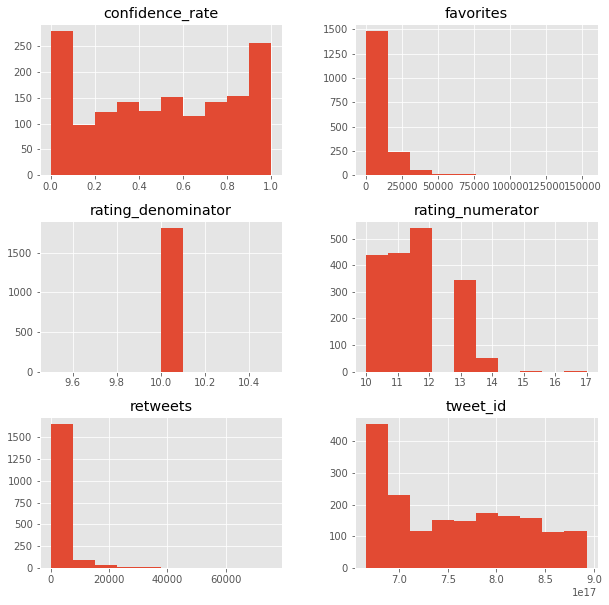

In [448]:
twitter_archive_master.hist(figsize=(10,10));

In [431]:
twitter_archive_master[['rating_numerator', 'retweets', 'favorites', 'confidence_rate']].describe()

,rating_numerator,retweets,favorites,confidence_rate
count,1820.000000,1797.000000,1797.000000,1580.000000
mean,11.524176,3047.478575,8630.111853,0.502669
std,1.140955,4850.392122,12397.051743,0.331127
min,10.000000,1.000000,0.000000,0.000000
25%,11.000000,660.000000,1680.000000,0.219004
50%,12.000000,1634.000000,4068.000000,0.511687
75%,12.000000,3534.000000,11172.000000,0.805457
max,17.000000,75653.000000,152849.000000,0.999953


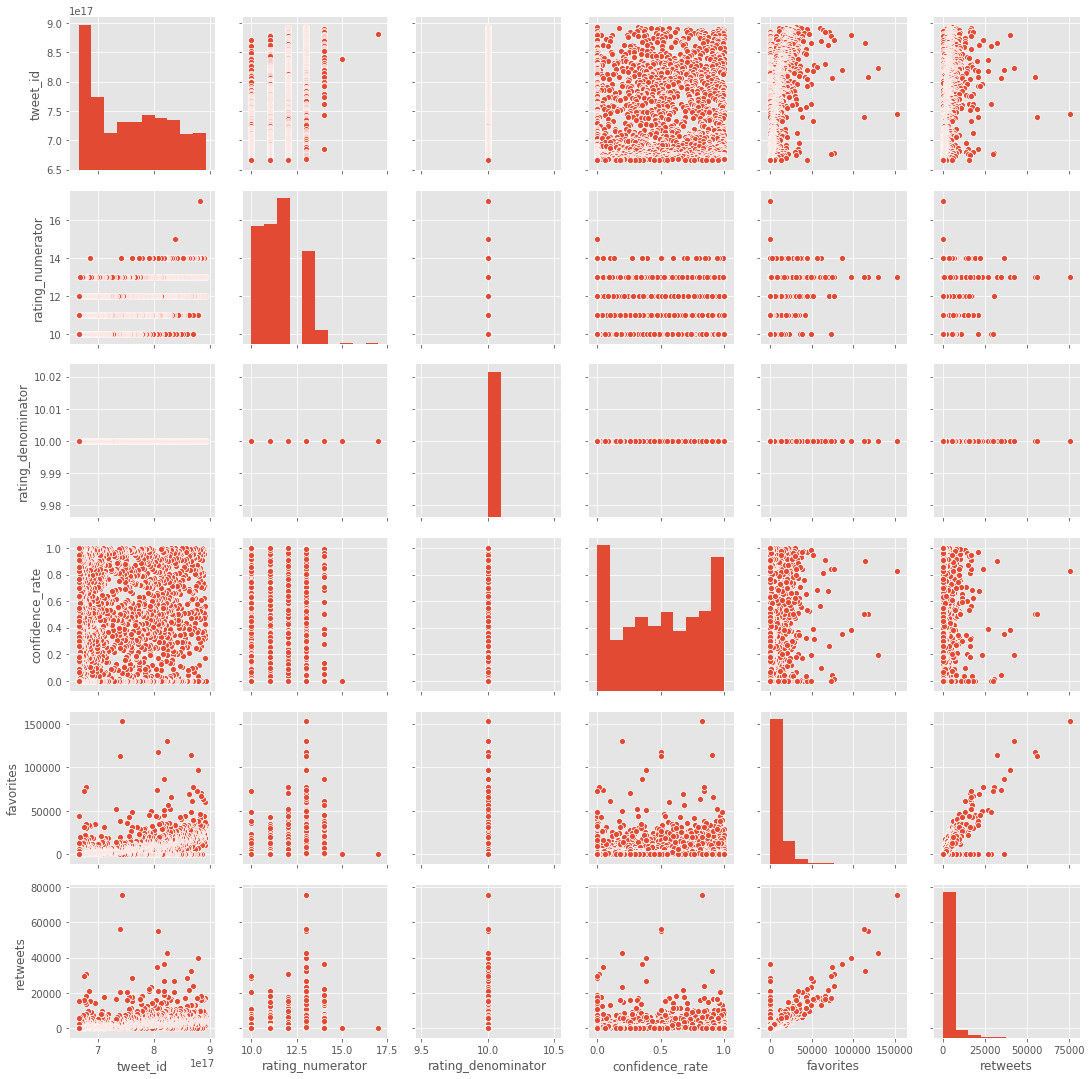

In [435]:
# Scatter plot of master_df_clean using seaborn
sns_plot = sns.pairplot(twitter_archive_master, size=2.5)

In [436]:
# Correlation
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,confidence_rate,favorites,retweets
tweet_id,1.000000,0.553527,NaN,0.066566,0.472138,0.331368
rating_numerator,0.553527,1.000000,NaN,0.057635,0.380956,0.318144
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN
confidence_rate,0.066566,0.057635,NaN,1.000000,0.039675,-0.002041
favorites,0.472138,0.380956,NaN,0.039675,1.000000,0.790486
retweets,0.331368,0.318144,NaN,-0.002041,0.790486,1.000000


<font color = 'Blue'><b><h2>B) Correlation Heatmap:</h2></b></font>

Text(0.5, 1, 'Correlation HeatMap')

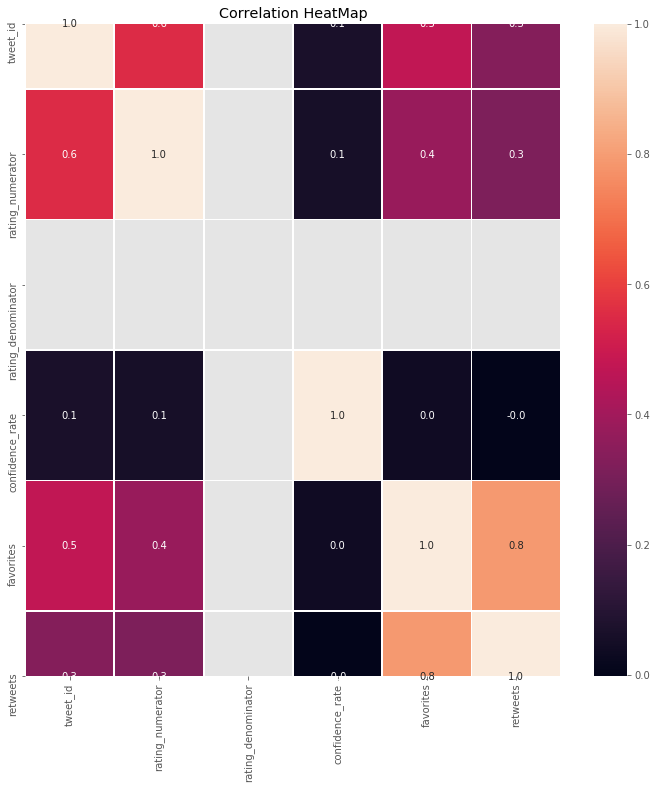

In [433]:
#put up a correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(twitter_archive_master.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation HeatMap')

# Analysis between Features

In [437]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

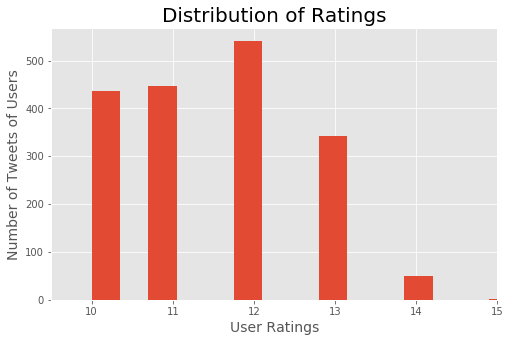

In [438]:
#Get the distribution between user ratings and tweets of users
twitter_archive_master['rating_numerator'].plot(kind = 'hist', bins = 20)
plt.xlim(9.5, 15)
plt.ylabel('Number of Tweets of Users', fontsize = 14)
plt.xlabel('User Ratings', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 20)
plt.show();

From correlation heatmap we can see the strong correlation between <b>favorite_count and retweet_count</b>

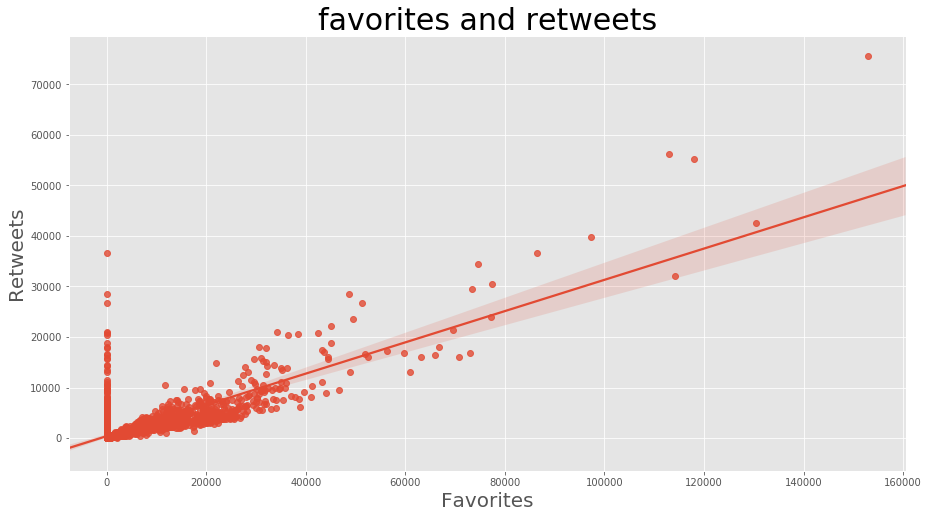

In [440]:
# Seaborn regplot
plt.figure(figsize=(15,8))
plt.title("favorites and retweets", size=30)
sns.regplot(x='favorites', y='retweets', data=twitter_archive_master)
plt.ylabel("Retweets", size=20)
plt.xlabel("Favorites", size=20);

The most common breed types from the dataset

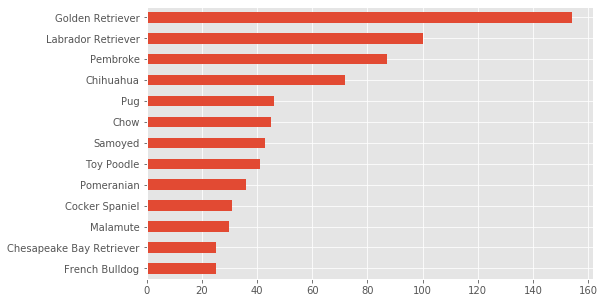

In [444]:
# Plot the 12 most common dog breeds in bar chart
only_dogs = twitter_archive_master['breed_type'] != 'None'
twitter_archive_master[only_dogs].breed_type.value_counts()[12::-1].plot(kind='barh')

The Pie Chart of the dog status 

Text(0.5, 1.0, 'Dog Status')

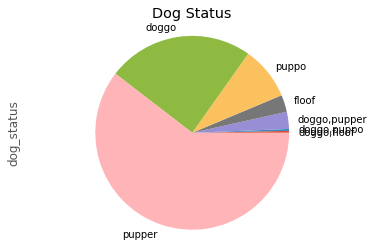

In [489]:
dog_status_n = twitter_archive_master['dog_status'] != 'None'
twitter_archive_master[dog_status_n].dog_status.value_counts()[8::-1].plot(kind='pie')
plt.axis('equal')
plt.title('Dog Status')

The average source of the tweets distributions

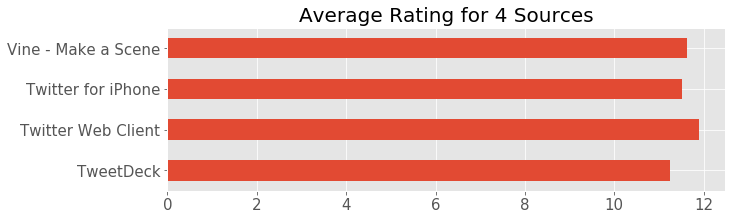

In [464]:
# Plot average rating for 3 sources in bar chart
plt.figure(figsize=(10,3))
plt.title("Average Rating for 4 Sources", size=20)
twitter_archive_master.groupby(['source']).rating_numerator.mean().plot(kind='barh',fontsize=15)
plt.ylabel('', fontsize=15);

The relation between ratings and its sources.

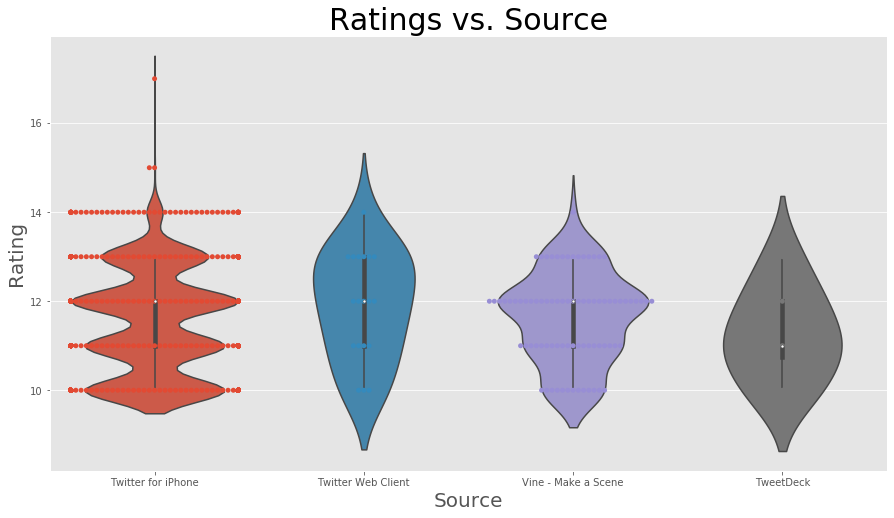

In [490]:
plt.figure(figsize=(15,8))

sns.swarmplot(x="source", y="rating_numerator", data=twitter_archive_master)
sns.violinplot(x="source", y="rating_numerator", data=twitter_archive_master)

plt.title("Ratings vs. Source", size=30)
plt.xlabel('Source', fontsize=20)
plt.ylabel('Rating', fontsize=20);

The tweets of users distributed by time

In [491]:
tweetsovertime = twitter_archive_master.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweets'].sum()\
.reset_index().sort_values('timestamp')[:-1]

Text(0, 0.5, 'Retweets')

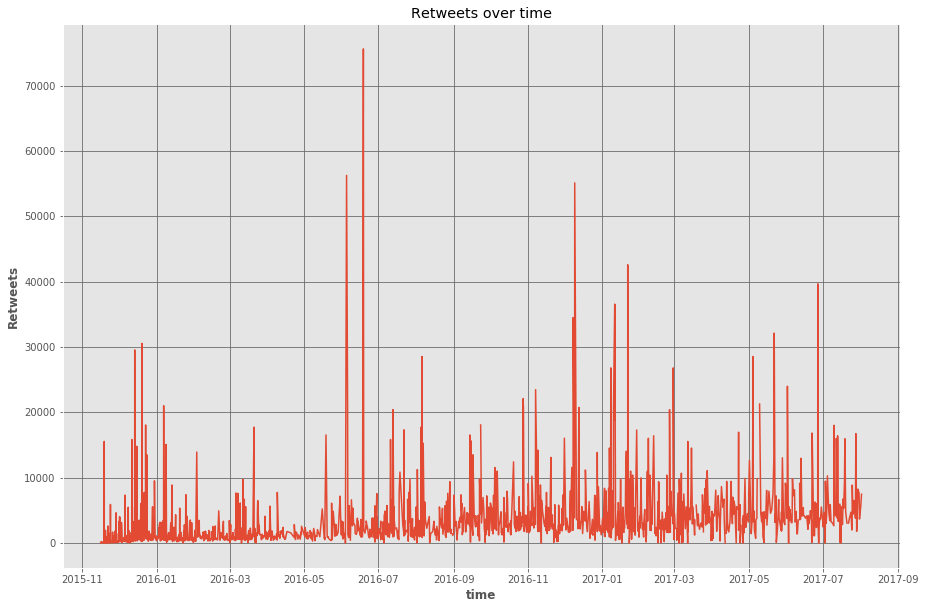

In [495]:
plt.subplots(figsize=(15, 10))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.retweets)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Retweets over time')
plt.xlabel('time', weight='bold')
plt.ylabel('Retweets', weight='bold')